# Distributions

Interesting sources: 
- https://www.edx.org/course/probability-the-science-of-uncertainty-and-data

In [1]:
import numpy as np
import pandas as pd

# Uniform distribution

## Rolling a 6-sided die

<img src="https://wherethewindsblow.com/wp-content/uploads/2015/07/JUMBO-Six-sided-white-dice.jpg" style="width: 300px;"/>

In [2]:
minValue = 1
maxValue = 6
numberOfSamples = 6 # Increase number to show that it converges to a uniform distribution

In [3]:
results = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=numberOfSamples) )

In [4]:
results

0    1
1    5
2    5
3    1
4    3
5    3
dtype: int32

<AxesSubplot:>

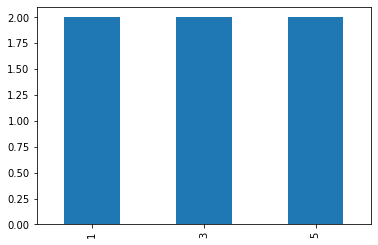

In [5]:
results.value_counts().sort_index().plot(kind='bar')

## Normal distribution

### Sampling from the average length a full-grown citizen in the Netherlands.

In [6]:
averageLength = 174.25
stdLength = 8
numberOfPeopleToSample = 1000 # Play with these values to show the impact on the histogram

In [7]:
randomLengths = pd.Series( np.random.normal(averageLength, stdLength, numberOfPeopleToSample) )

In [8]:
randomLengths

0      176.493137
1      169.047707
2      167.795386
3      173.071585
4      182.739236
          ...    
995    178.163710
996    179.504000
997    168.255345
998    174.369045
999    163.343915
Length: 1000, dtype: float64

<AxesSubplot:ylabel='Frequency'>

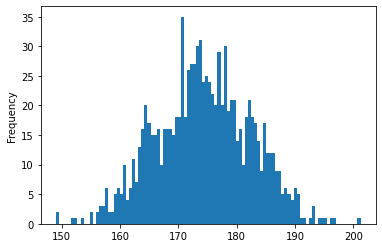

![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg 'Normal distribution')

### Examples of normal distribution in real life
- https://studiousguy.com/real-life-examples-normal-distribution/
- https://galtonboard.com/probabilityexamplesinlife

### Central limit theorem

In [10]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10 # 10000

for i in range(sampleMeansSize):
    randomLengths = pd.Series( np.random.normal(averageLength, stdLength, sampleSize) )
    sampleMeans.append(randomLengths.mean())

In [11]:
sampleMeans

[174.12459359125413,
 174.46698999407712,
 174.25028455430532,
 175.63388008904292,
 174.3705139233411,
 173.07300385690647,
 173.9454986918605,
 175.0955768303424,
 175.36487802170913,
 174.55319559676116]

<AxesSubplot:ylabel='Frequency'>

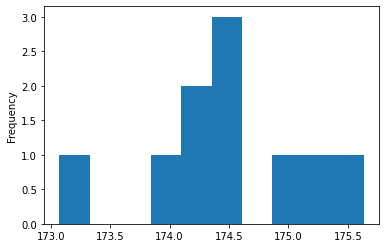

In [12]:
pd.Series(sampleMeans).plot(kind='hist', bins = 10)

In [13]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000

for i in range(sampleMeansSize):
    randomRolls = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=sampleSize) )
    sampleMeans.append(randomRolls.mean())

<AxesSubplot:ylabel='Frequency'>

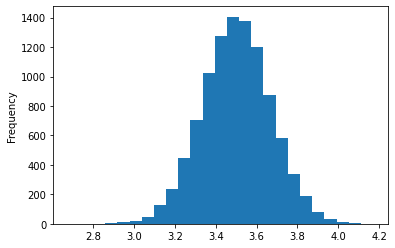

In [14]:
pd.Series(sampleMeans).plot(kind='hist', bins = 25)

### Confidence interval

![](https://getcalc.com/formula/statistics/mean-confidence-interval-infinite-population.png)

So let's reconsider one sample. Based on this one sample, what can we say about the mean of the underlying population?

In [15]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomLengths)-1, loc=randomLengths.mean(), scale=st.sem(randomLengths))

(173.11790518044245, 175.98848601307986)

In [16]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomRolls)-1, loc=randomRolls.mean(), scale=st.sem(randomRolls))

(3.2342146130026435, 3.865785386997356)

Let's apply this to the iris dataset. What is the 95% confidence interval of the sepal_length? Meaning, let's calculate the interval that contains the real mean sepal length with 95% confidence.

In [17]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(iris)-1, loc=iris['sepal_length'].mean(), scale=st.sem(iris['sepal_length']))

(5.709732481507366, 5.976934185159301)

### Portfolio assignment 7
15 min: Look at the histogram of at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you recognise the distribution? Does it look like a uniform or normal distribution or something else? If it doesn't look like a uniform or normal distribution, take a quick look here to see if you can find the distribution shape: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

![](https://i.imgur.com/0v1CGNV.png)

<AxesSubplot:ylabel='Frequency'>

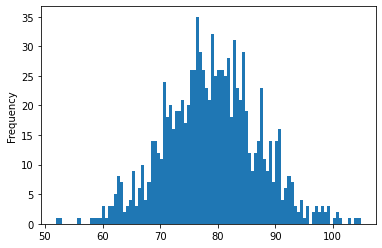

In [19]:
pokemons = pd.read_csv('Pokemon.csv')
randomAttackStats = pd.Series(np.random.normal(pokemons['Attack'].mean(), 8, 1000) )
randomAttackStats.plot(kind='hist', bins=100)


 It's a normal distribution

<AxesSubplot:ylabel='Frequency'>

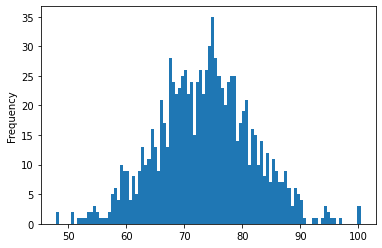

In [20]:
randomDefenseStats = pd.Series(np.random.normal(pokemons['Defense'].mean(), 8, 1000) )
randomDefenseStats.plot(kind='hist', bins=100)
# It's a normal distribution

 It's also a normal distribution

### Portfolio assignment 8
15 min: 
- Calculate the 90%, 95%, 99% and 99.99% confidence interval for at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you see the impact the confidence has on the interval?
- Now calculate the 95% confidence interval again but use only the first 10% of your rows. Compare this interval to the previous 95% confidence interval you calculated. Do you see the impact of having less data?

![](https://i.imgur.com/0v1CGNV.png)

In [21]:
confidence = 0.90
st.t.interval(confidence, len(pokemons)-1, loc=pokemons['Attack'].mean(), scale=st.sem(pokemons['Attack']))


(77.11152171030228, 80.89097828969771)

In [22]:
confidence = 0.95
st.t.interval(confidence, len(pokemons)-1, loc=pokemons['Attack'].mean(), scale=st.sem(pokemons['Attack']))

(76.74869843886454, 81.25380156113546)

In [23]:
confidence = 0.99
st.t.interval(confidence, len(pokemons)-1, loc=pokemons['Attack'].mean(), scale=st.sem(pokemons['Attack']))

(76.03830265303164, 81.96419734696836)

In [24]:
confidence = 0.90
st.t.interval(confidence, len(pokemons)-1, loc=pokemons['Defense'].mean(), scale=st.sem(pokemons['Defense']))


(72.02693852111383, 75.65806147888617)

In [25]:
confidence = 0.95
st.t.interval(confidence, len(pokemons)-1, loc=pokemons['Defense'].mean(), scale=st.sem(pokemons['Defense']))

(71.67835509837681, 76.00664490162319)

In [26]:
confidence = 0.99
st.t.interval(confidence, len(pokemons)-1, loc=pokemons['Defense'].mean(), scale=st.sem(pokemons['Defense']))

(70.99584045828132, 76.68915954171868)

The confidence interval gets lower when the level get higher

In [27]:
confidence = 0.95
st.t.interval(confidence, len(pokemons)/10, loc=pokemons['Attack'].mean(), scale=st.sem(pokemons['Attack']))


(76.71757028293392, 81.28492971706608)

In [28]:
st.t.interval(confidence, len(pokemons)/10, loc=pokemons['Defense'].mean(), scale=st.sem(pokemons['Defense']))

(71.64844863980046, 76.03655136019954)

The confidence interval get a lot closer when the amount of data is smalled down